In [92]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [133]:
# Creating regional lists
EUCA = 'Albania; Armenia; Azerbaijan; Belarus; Bosnia and Herzegovina; Bulgaria; Croatia; Georgia; Kazakhstan; Kyrgyzstan; Montenegro; Republic of Moldova; Romania; Russian Federation; Serbia; Tajikistan; Macedonia; Turkey; Turkmenistan; Ukraine; Uzbekistan'
EUCA = EUCA.replace(';', ',')
EUCA = EUCA.split(', ')

EAP = 'Australia; Brunei Darussalam; Cambodia; China; Cook Islands; Democratic People’s Republic of Korea; Fiji; Indonesia; Japan; Kiribati; Lao People’s Democratic Republic; Malaysia; Marshall Islands; Micronesia; Mongolia; Myanmar; Nauru; New Zealand; Niue; Palau; Papua New Guinea; Philippines; Republic of Korea; Samoa; Singapore; Solomon Islands; Thailand; Timor-Leste; Tokelau ; Tonga; Tuvalu; Vanuatu; Vietnam'
EAP = EAP.replace(';', ',')
EAP = EAP.split(', ')

SAS = ['Afghanistan', 'Bangladesh', 'Bhutan', 'India', 'Maldives', 'Nepal', 'Pakistan', 'Sri Lanka']

WEU = 'Andorra; Austria; Belgium; Cyprus; Czechia; Denmark; Estonia; Finland; France; Germany; Greece; Holy See; Hungary; Iceland; Ireland; Italy; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Netherlands; Norway; Poland; Portugal; San Marino; Slovakia; Slovenia; Spain; Sweden; Switzerland; United Kingdom'
WEU = WEU.replace(';', ',')
WEU = WEU.split(', ')

LAC = 'Anguilla; Antigua and Barbuda; Argentina; Bahamas; Barbados; Belize; Bolivia; Brazil; British Virgin Islands; Chile; Colombia; Costa Rica; Cuba; Dominica; Dominican Republic; Ecuador; El Salvador; Grenada; Guatemala; Guyana; Haiti; Honduras; Jamaica; Mexico; Montserrat; Nicaragua; Panama; Paraguay; Peru; Saint Kitts and Nevis; Saint Lucia; Saint Vincent and the Grenadines; Suriname; Trinidad and Tobago; Turks and Caicos Islands; Uruguay; Venezuela'
LAC = LAC.replace(';', ',')
LAC = LAC.split(', ')

MENA = 'Algeria; Bahrain; Egypt, Arab Rep.; Iran; Iraq; Israel; Jordan; Kuwait; Lebanon; Libya; Morocco; Oman; Qatar; Saudi Arabia; State of Palestine; Syrian Arab Republic; Tunisia; United Arab Emirates; Yemen'
MENA = MENA.replace(';', ',')
MENA = MENA.split(', ')

NA = ['Canada', 'United States']

ESAF = 'Angola; Botswana; Burundi; Comoros; Djibouti; Eritrea; Ethiopia; Kenya; Lesotho; Madagascar; Malawi; Mauritius; Mozambique; Namibia; Rwanda; Seychelles; Somalia; South Africa; South Sudan; Sudan; Swaziland; Uganda; United Republic of Tanzania; Zambia; Zimbabwe'
ESAF = ESAF.replace(';', ',')
ESAF = ESAF.split(', ')

WCAF = 'Benin; Burkina Faso; Cabo Verde; Cameroon; Central African Republic; Chad; Congo; Côte d’Ivoire; Democratic Republic of the Congo; Equatorial Guinea; Gabon; Gambia; Ghana; Guinea; Guinea-Bissau; Liberia; Mali; Mauritania; Niger; Nigeria; Sao Tome and Principe; Senegal; Sierra Leone; Togo'
WCAF = WCAF.replace(';', ',')
WCAF = WCAF.split(', ')

reg_list = ['EUCA', 'EAP', 'SAS', 'WEU', 'LAC', 'MENA', 'NA', 'ESAF', 'WCAF']

In [134]:
xls = pd.ExcelFile('data/elec_access_data2020.xls')
df1 = pd.read_excel(xls, 'Summary')
df2 = pd.read_excel(xls, 'Developing Asia')
df3 = pd.read_excel(xls, 'Africa')
df4 = pd.read_excel(xls, 'Central and South America')
df5 = pd.read_excel(xls, 'Middle East')
df3.head(10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,"Source: IEA, World Energy Outlook-2020",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Electricity Access in Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Proportion of the population with access to el...,NaN,NaN,NaN,NaN,NaN,NaN,Population without access (million)
4,NaN,NaN,NaN,National,NaN,NaN,NaN,NaN,Urban,Rural,NaN
5,NaN,NaN,NaN,2000,2005,2010,2015,2019,2019,2019,2019
6,NaN,NaN,Africa,0.355,0.395,0.437,0.492,0.557,0.808,0.368,579.2
7,NaN,NaN,North Africa,0.905,0.969,>99%,>99%,>99%,>99%,>99%,<1
8,NaN,NaN,Algeria,0.98,0.983,>99%,>99%,>99%,>99%,0.967,<1
9,NaN,NaN,Egypt,0.938,0.983,>99%,>99%,>99%,>99%,>99%,<1


In [135]:
df2.columns = range(df2.shape[1])
df2.columns = pd.to_datetime(df2.loc[5], format='%Y')
df2.columns = df2.columns.year
df2 = df2[7:]
df3.columns = range(df3.shape[1])
df3.columns = pd.to_datetime(df3.loc[5], format='%Y')
df3.columns = df3.columns.year
df3 = df3[7:]
df4.columns = range(df4.shape[1])
df4.columns = pd.to_datetime(df4.loc[5], format='%Y')
df4.columns = df4.columns.year
df4 = df4[7:]
df5.columns = range(df5.shape[1])
df5.columns = pd.to_datetime(df5.loc[5], format='%Y')
df5.columns = df5.columns.year
df5 = df5[7:]

In [148]:
# Combine all piecemeal data from IEA into one dataframe.
global_ae = pd.concat([df2, df3, df4, df5]).dropna(how='all', axis=1)
global_ae.columns = global_ae.columns.fillna('country')
global_ae = global_ae.replace('>99%', 1.)
global_ae = global_ae.iloc[:,:6].reset_index()
global_ae = global_ae.drop('index', axis=1)
global_ae.insert(6, 'region', np.nan)
global_ae.columns = ['country', 2000, 2005, 2010, 2015, 2019, 'region']
global_ae

,country,2000,2005,2010,2015,2019,region
0,China,0.986,1.0,1.0,1.000,1.000,NaN
1,India,0.43,0.577,0.679,0.789,1.000,NaN
2,Indonesia,0.534,0.561,0.672,0.883,1.000,NaN
3,Other Southeast Asia,0.645,0.754,0.793,0.846,0.908,NaN
4,Brunei,1.0,1.0,1.0,1.000,1.000,NaN
5,Cambodia,0.043,0.118,0.229,0.494,0.748,NaN
6,Laos,0.43,0.57,0.75,0.905,0.948,NaN
7,Malaysia,0.969,0.981,1.0,1.000,1.000,NaN
8,Myanmar,0.05,0.134,0.24,0.300,0.506,NaN
9,Philippines,0.737,0.767,0.797,0.896,0.964,NaN


In [149]:
# Assigning each country to a region based on list fron UNICEF.
for index in range(global_ae.shape[0]):
    if global_ae.loc[index, 'country'] in EUCA:
        global_ae.loc[index, 'region'] = 'EUCA'
    elif global_ae.loc[index, 'country'] in EAP:
        global_ae.loc[index, 'region'] = 'EAP'
    elif global_ae.loc[index, 'country'] in SAS:
        global_ae.loc[index, 'region'] = 'SAS'
    elif global_ae.loc[index, 'country'] in WEU:
        global_ae.loc[index, 'region'] = 'WEU'    
    elif global_ae.loc[index, 'country'] in LAC:
        global_ae.loc[index, 'region'] = 'LAC'        
    elif global_ae.loc[index, 'country'] in MENA:
        global_ae.loc[index, 'region'] = 'MENA'    
    elif global_ae.loc[index, 'country'] in NA:
        global_ae.loc[index, 'region'] = 'NA'    
    elif global_ae.loc[index, 'country'] in ESAF:
        global_ae.loc[index, 'region'] = 'ESAF'
    elif global_ae.loc[index, 'country'] in WCAF:
        global_ae.loc[index, 'region'] = 'WCAF'    
    else: pass



# Classifying null regions for relevant countries
null_reg = global_ae[global_ae.region.isna()]
global_ae.loc[4,'region'] = 'EAP'
global_ae.loc[6,'region'] = 'EAP'
global_ae.loc[50,'region'] = 'WCAF'
global_ae.loc[55,'region'] = 'WCAF'
global_ae.loc[77,'region'] = 'ESAF'
global_ae.loc[78,'region'] = 'ESAF'
global_ae.loc[110,'region'] = 'MENA'

# Drop all other countries
global_ae = global_ae[global_ae.region.notna()]
global_ae

,country,2000,2005,2010,2015,2019,region
0,China,0.986,1.0,1.0,1.000,1.000,EAP
1,India,0.43,0.577,0.679,0.789,1.000,SAS
2,Indonesia,0.534,0.561,0.672,0.883,1.000,EAP
4,Brunei,1.0,1.0,1.0,1.000,1.000,EAP
5,Cambodia,0.043,0.118,0.229,0.494,0.748,EAP
6,Laos,0.43,0.57,0.75,0.905,0.948,EAP
7,Malaysia,0.969,0.981,1.0,1.000,1.000,EAP
8,Myanmar,0.05,0.134,0.24,0.300,0.506,EAP
9,Philippines,0.737,0.767,0.797,0.896,0.964,EAP
10,Singapore,1.0,1.0,1.0,1.000,1.000,EAP


In [138]:
import geonamescache
import geopandas
import ast

In [101]:
gc = geonamescache.GeonamesCache()
countries = pd.DataFrame(gc.get_countries()).T
continents = pd.DataFrame(gc.get_continents()).T
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.00,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.00,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.50,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.00,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.00,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,6909701,Oceania,Papua New Guinea,PNG,28020.00,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,44293293,South America,Argentina,ARG,879400.00,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


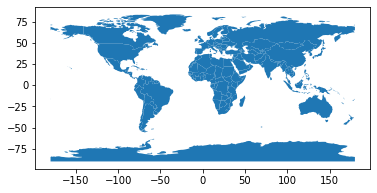

In [103]:
cities
world.plot()
world

In [183]:
global_ae
world = world.rename(columns={'name':'country'})
new_world = pd.merge(world, global_ae, on='country', how='left')
new_world

,pop_est,continent,country,iso_a3,gdp_md_est,geometry,2000,2005,2010,2015,2019,region
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",0.105,0.116,0.18,0.30,0.395,ESAF
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,NaN,NaN,NaN
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",0.99,1.0,0.99,0.98,1.000,LAC


[(0.00784313725490196, 0.24313725490196078, 1.0),
 (1.0, 0.48627450980392156, 0.0),
 (0.10196078431372549, 0.788235294117647, 0.2196078431372549),
 (0.9098039215686274, 0.0, 0.043137254901960784),
 (0.5450980392156862, 0.16862745098039217, 0.8862745098039215),
 (0.6235294117647059, 0.2823529411764706, 0.0),
 (0.9450980392156862, 0.2980392156862745, 0.7568627450980392),
 (0.6392156862745098, 0.6392156862745098, 0.6392156862745098),
 (1.0, 0.7686274509803922, 0.0),
 (0.0, 0.8431372549019608, 1.0)]

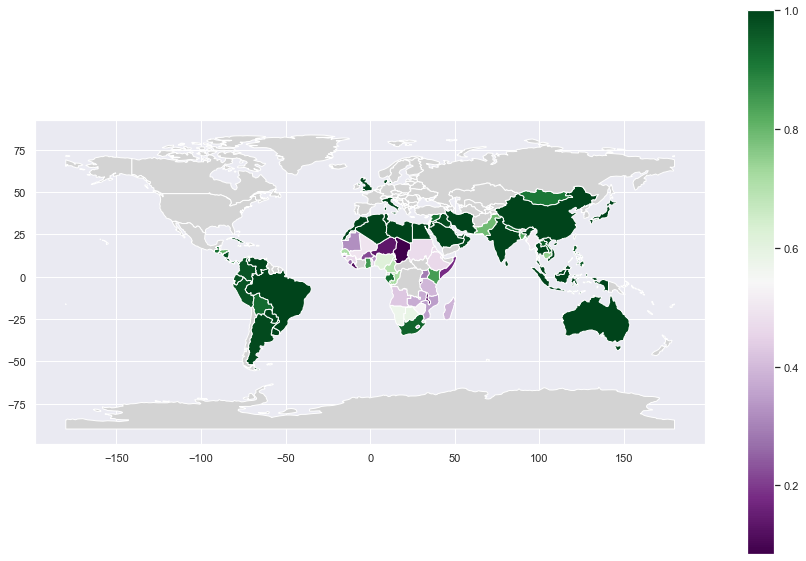

In [203]:
import seaborn as sns
sns.set(style="darkgrid")
palette = sns.color_palette("bright", 10)
new_world.plot(column=2019, cmap='PRGn', legend=True, figsize=(15,10), missing_kwds={'color': 'lightgrey'})
palette

In [ ]:
world.plot?

In [194]:
# 195 countries as of today
countries    # 252 recognized countries is too much
world    # 177 recognized countries
foo = pd.merge(world, global_ae, on='country', how='left').set_index('country')
foo[foo.region.isna()].iloc[:,2:]

# IEA did not analyze data from "developed countries" ie Europe and North Am, or the Caribbean... (~80 countries)

,iso_a3,gdp_md_est,geometry,2000,2005,2010,2015,2019,region
country,,,,,,,,,
Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",NaN,NaN,NaN,NaN,NaN,NaN
United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN,NaN,NaN
Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
Macedonia,MKD,29520.0,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",NaN,NaN,NaN,NaN,NaN,NaN
Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",NaN,NaN,NaN,NaN,NaN,NaN
Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",NaN,NaN,NaN,NaN,NaN,NaN


In [173]:
# attempting to manually add missing countries. fail
global_ae.head(10)
global_ae.at[113] = ['United States',1.,1.,1.,1.,1., 'NA']
global_ae.at[114] = ['Japan',1.,1.,1.,1.,1., 'EAP']
global_ae.at[115] = ['United Kingdom',1.,1.,1.,1.,1., 'WEU']
global_ae.at[116] = ['Denmark',1.,1.,1.,1.,1., 'WEU']
global_ae.at[117] = ['Italy',1.,1.,1.,1.,1., 'WEU']
global_ae.at[118] = ['Australia',1.,1.,1.,1.,1., 'EAP']

In [167]:
## europe list
for index in range(world.shape[0]):
    if world.loc[index, 'continent'] == 'Europe':
        print(world.loc[index, 'country'])

Russia
Norway
France
Sweden
Belarus
Ukraine
Poland
Austria
Hungary
Moldova
Romania
Lithuania
Latvia
Estonia
Germany
Bulgaria
Greece
Albania
Croatia
Switzerland
Luxembourg
Belgium
Netherlands
Portugal
Spain
Ireland
Italy
Denmark
United Kingdom
Iceland
Slovenia
Finland
Slovakia
Czechia
Bosnia and Herz.
Macedonia
Serbia
Montenegro
Kosovo


<AxesSubplot:>

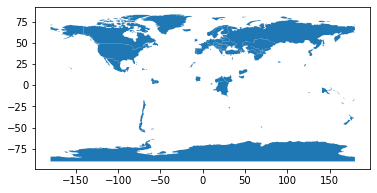

In [169]:
foo[foo.region.isna()].plot()


In [58]:
global_ae[['country',2019.0]].sort_values(2019.0, ascending=False).head(40)

5,country,2019.0
0,China,1.000
91,Bahrain,1.000
100,Qatar,1.000
98,Saudi Arabia,1.000
96,Lebanon,1.000
95,Kuwait,1.000
94,Jordan,1.000
76,Cuba,1.000
92,Iran,1.000
90,Venezuela,1.000


In [56]:
global_ae

5,country,2000.0,2005.0,2010.0,2015.0,2019.0,region
0,China,0.986,1.0,1.0,1.000,1.000,EAP
1,India,0.43,0.577,0.679,0.789,1.000,SAS
2,Indonesia,0.534,0.561,0.672,0.883,1.000,EAP
4,Cambodia,0.043,0.118,0.229,0.494,0.748,EAP
6,Malaysia,0.969,0.981,1.0,1.000,1.000,EAP
...,...,...,...,...,...,...,...
98,Saudi Arabia,0.977,0.972,0.99,1.000,1.000,MENA
100,Qatar,0.95,0.969,0.987,1.000,1.000,MENA
101,United Arab Emirates,0.96,0.935,1.0,1.000,1.000,MENA
102,Yemen,0.5,0.369,0.396,0.460,0.465,MENA
